# **SKYHACK 2.0**


### **Team Name**: Jet Set Analyst
### **Team Members Name**: Heena Saini and Kavya Sethia
### **College Name**: IGDTUW
                                                                                                                                                                                                                                                                 


## Problem Statement

As United Airlines continues its journey to become the best airline in the history of aviation, it is crucial to provide world-class customer service, for which one of the key areas of focus is our call center operations. Call centers play a critical role in ensuring customer issues are resolved quickly and efficiently, but we face challenges in improving metrics such as Average Handle Time (AHT) and Average Speed to Answer (AST).

Your task is to optimize these key call center metrics, helping reduce resolution times and providing faster, more efficient service to our customers. You are required to analyze our existing call center data to identify inefficiencies, determine the drivers of long AHT and AST, and suggest strategies to enhance customer satisfaction, reduce escalations, and improve overall operational efficiency.

**Deliverables**:

1. Long average handle time (AHT) affects both efficiency and customer satisfaction. Explore the factors contributing to extended call durations, such as agent performance, call types, and sentiment. Identify key drivers of long AHT and AST, especially during high volume call periods. Additionally, could you quantify the percentage difference between the average handling time for the most frequent and least frequent call reasons?



2. We often observe self-solvable issues unnecessarily escalating to agents, increasing their workload. Analyse the transcripts and call reasons to identify granular reasons associated to recurring problems that could be resolved via self-service options in the IVR system. Propose specific improvements to the IVR options to effectively reduce agent intervention in these cases, along with solid reasoning to support your recommendations.



3. Understanding the primary reasons for incoming calls is vital for enhancing operational efficiency and improving customer service. Accurately categorizing call reasons enables the call center to streamline processes, reduce manual tagging efforts, and ensure that customers are directed to the appropriate resources. In this context, analyze the dataset to uncover patterns that can assist in understanding and identifying these primary call reasons. Please outline your approach, detailing the data analysis techniques and feature identification methods you plan to use. **Optional task, you may utilize the `test.csv` file to generate and submit your predictions**.




### STEPS:

#### 1. Data Understanding
#### 2. Data Handling
#### 3. Data Analyzing
#### 4. Data Visualisation
#### 5. Uncover Insights



                      


##  Importing Required Libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [137]:
# to supress warnings

import warnings 
warnings.filterwarnings('ignore')

##  Load Datasets

In [3]:
df_test = pd.read_csv(r"C:\Users\Prajat\Desktop\UA\testbc7185d.csv")
df_test

,call_id
0,7732610078
1,2400299738
2,6533095063
3,7774450920
4,9214147168
...,...
5152,5300201106
5153,727694488
5154,147487837
5155,5330794838


In [4]:
df_sentiment = pd.read_csv(r"C:\Users\Prajat\Desktop\UA\sentiment_statisticscc1e57a.csv")
df_sentiment

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...
71805,1563273072,413148,calm,calm,0.05,0.34
71806,8865997781,980156,calm,frustrated,0.03,0.22
71807,8019240181,616988,calm,polite,0.05,0.42
71808,8332067080,161354,neutral,polite,-0.07,0.13


In [5]:
df_reasons = pd.read_csv(r"C:\Users\Prajat\Desktop\UA\reason18315ff.csv")
df_reasons

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating
...,...,...
66648,7569738090,Mileage Plus
66649,1563273072,Post Flight
66650,8865997781,Upgrade
66651,8019240181,Upgrade


In [6]:
df_customers = pd.read_csv(r"C:\Users\Prajat\Desktop\UA\customers2afd6ea.csv")
df_customers

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0
...,...,...,...
71805,8022667294,Dennis Singleton DDS,NaN
71806,4474867021,Paul Mitchell,1.0
71807,9762042472,Kaylee Lang,NaN
71808,8095620266,Christine Oneal,1.0


In [7]:
df_calls = pd.read_csv(r"C:\Users\Prajat\Desktop\UA\callsf0d4f5a.csv")
df_calls

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...
...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...


## Combining Data

In [8]:
df_combined1 = pd.merge(df_sentiment, df_reasons, on = 'call_id', how = 'outer')
df_combined1

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason
0,4667960400,963118,neutral,angry,-0.04,0.39,Voluntary Cancel
1,1122072124,519057,calm,neutral,0.02,0.35,Booking
2,6834291559,158319,neutral,polite,-0.13,0.32,IRROPS
3,2266439882,488324,neutral,frustrated,-0.20,0.20,Upgrade
4,1211603231,721730,neutral,polite,-0.05,0.35,Seating
...,...,...,...,...,...,...,...
71805,1563273072,413148,calm,calm,0.05,0.34,Post Flight
71806,8865997781,980156,calm,frustrated,0.03,0.22,Upgrade
71807,8019240181,616988,calm,polite,0.05,0.42,Upgrade
71808,8332067080,161354,neutral,polite,-0.07,0.13,NaN


In [9]:
df_combined2 = pd.merge(df_combined1, df_calls, on = 'call_id', how = 'outer')
df_combined2

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_id,agent_id_y,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,963118,neutral,angry,-0.04,0.39,Voluntary Cancel,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,519057,calm,neutral,0.02,0.35,Booking,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,158319,neutral,polite,-0.13,0.32,IRROPS,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,488324,neutral,frustrated,-0.20,0.20,Upgrade,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,721730,neutral,polite,-0.05,0.35,Seating,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,413148,calm,calm,0.05,0.34,Post Flight,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...
71806,8865997781,980156,calm,frustrated,0.03,0.22,Upgrade,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...
71807,8019240181,616988,calm,polite,0.05,0.42,Upgrade,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...
71808,8332067080,161354,neutral,polite,-0.07,0.13,NaN,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...


In [10]:
df = pd.merge(df_combined2, df_customers, on = 'customer_id', how = 'left')
df

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_id,agent_id_y,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code
0,4667960400,963118,neutral,angry,-0.04,0.39,Voluntary Cancel,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0
1,1122072124,519057,calm,neutral,0.02,0.35,Booking,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN
2,6834291559,158319,neutral,polite,-0.13,0.32,IRROPS,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN
3,2266439882,488324,neutral,frustrated,-0.20,0.20,Upgrade,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0
4,1211603231,721730,neutral,polite,-0.05,0.35,Seating,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,413148,calm,calm,0.05,0.34,Post Flight,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...,Dennis Singleton DDS,NaN
71806,8865997781,980156,calm,frustrated,0.03,0.22,Upgrade,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...,Paul Mitchell,1.0
71807,8019240181,616988,calm,polite,0.05,0.42,Upgrade,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...,Kaylee Lang,NaN
71808,8332067080,161354,neutral,polite,-0.07,0.13,NaN,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...,Christine Oneal,1.0


## Defining Combined Data

### 1. Display Top 5 Rows of the Dataset

In [12]:
df.head(5)

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_id,agent_id_y,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code
0,4667960400,963118,neutral,angry,-0.04,0.39,Voluntary Cancel,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0
1,1122072124,519057,calm,neutral,0.02,0.35,Booking,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN
2,6834291559,158319,neutral,polite,-0.13,0.32,IRROPS,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN
3,2266439882,488324,neutral,frustrated,-0.20,0.20,Upgrade,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0
4,1211603231,721730,neutral,polite,-0.05,0.35,Seating,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0


### 2. Checking Last 3 Rows of the Dataset

In [13]:
df.tail(3)

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_id,agent_id_y,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code
71807,8019240181,616988,calm,polite,0.05,0.42,Upgrade,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...,Kaylee Lang,NaN
71808,8332067080,161354,neutral,polite,-0.07,0.13,NaN,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...,Christine Oneal,1.0
71809,8210720833,547592,neutral,calm,0.00,0.10,Digital Support,8014388758,547592,8/31/2024 23:49,8/31/2024 23:59,9/1/2024 0:02,\n\nAgent: Thank you for calling United Airlin...,Alicia Calderon,0.0


### 3. Finding Shape of the Dataset i.e, Number of Rows & Number of Columns¶

In [14]:
df.shape

(71810, 15)

In [15]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 71810
Number of Columns: 15


### 4. Get Informaation about the Dataset like Total Number of Rows, Total Number of Columns, Datatypes of each Column and Memory Requirement

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71810 entries, 0 to 71809
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_id                  71810 non-null  int64  
 1   agent_id_x               71810 non-null  int64  
 2   agent_tone               71593 non-null  object 
 3   customer_tone            71810 non-null  object 
 4   average_sentiment        71701 non-null  float64
 5   silence_percent_average  71810 non-null  float64
 6   primary_call_reason      66653 non-null  object 
 7   customer_id              71810 non-null  int64  
 8   agent_id_y               71810 non-null  int64  
 9   call_start_datetime      71810 non-null  object 
 10  agent_assigned_datetime  71810 non-null  object 
 11  call_end_datetime        71810 non-null  object 
 12  call_transcript          71810 non-null  object 
 13  customer_name            71810 non-null  object 
 14  elite_level_code      

In [17]:
df.dtypes

call_id                      int64
agent_id_x                   int64
agent_tone                  object
customer_tone               object
average_sentiment          float64
silence_percent_average    float64
primary_call_reason         object
customer_id                  int64
agent_id_y                   int64
call_start_datetime         object
agent_assigned_datetime     object
call_end_datetime           object
call_transcript             object
customer_name               object
elite_level_code           float64
dtype: object

## Dealing with Datatypes

In [18]:
df.columns

Index(['call_id', 'agent_id_x', 'agent_tone', 'customer_tone',
       'average_sentiment', 'silence_percent_average', 'primary_call_reason',
       'customer_id', 'agent_id_y', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'customer_name', 'elite_level_code'],
      dtype='object')

In [19]:
df.head(5)

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_id,agent_id_y,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code
0,4667960400,963118,neutral,angry,-0.04,0.39,Voluntary Cancel,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0
1,1122072124,519057,calm,neutral,0.02,0.35,Booking,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN
2,6834291559,158319,neutral,polite,-0.13,0.32,IRROPS,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN
3,2266439882,488324,neutral,frustrated,-0.20,0.20,Upgrade,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0
4,1211603231,721730,neutral,polite,-0.05,0.35,Seating,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0


In [20]:
# df['call_start_datetime'] = df['call_start_datetime'].str.replace('-', '/')

In [21]:
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'], format = '%m/%d/%Y %H:%M')

In [22]:
df['call_start_date'] = df['call_start_datetime'].dt.date
df['call_start_time'] = df['call_start_datetime'].dt.time

In [23]:
df.head()

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_id,agent_id_y,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,call_start_date,call_start_time
0,4667960400,963118,neutral,angry,-0.04,0.39,Voluntary Cancel,2033123310,963118,2024-07-31 23:56:00,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,2024-07-31,23:56:00
1,1122072124,519057,calm,neutral,0.02,0.35,Booking,8186702651,519057,2024-08-01 00:03:00,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,2024-08-01,00:03:00
2,6834291559,158319,neutral,polite,-0.13,0.32,IRROPS,2416856629,158319,2024-07-31 23:59:00,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,2024-07-31,23:59:00
3,2266439882,488324,neutral,frustrated,-0.20,0.20,Upgrade,1154544516,488324,2024-08-01 00:05:00,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,2024-08-01,00:05:00
4,1211603231,721730,neutral,polite,-0.05,0.35,Seating,5214456437,721730,2024-08-01 00:04:00,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,2024-08-01,00:04:00


In [24]:
df.columns

Index(['call_id', 'agent_id_x', 'agent_tone', 'customer_tone',
       'average_sentiment', 'silence_percent_average', 'primary_call_reason',
       'customer_id', 'agent_id_y', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'customer_name', 'elite_level_code', 'call_start_date',
       'call_start_time'],
      dtype='object')

In [25]:
# df['agent_assigned_datetime'] = df['agent_assigned_datetime'].str.replace('-', '/')

In [26]:
df['agent_assigned_datetime'] = pd.to_datetime(df['agent_assigned_datetime'], format = '%m/%d/%Y %H:%M')

In [27]:
df['agent_assigned_date'] = df['agent_assigned_datetime'].dt.date
df['agent_assigned_time'] = df['agent_assigned_datetime'].dt.time

In [28]:
df.head()

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_id,agent_id_y,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,call_start_date,call_start_time,agent_assigned_date,agent_assigned_time
0,4667960400,963118,neutral,angry,-0.04,0.39,Voluntary Cancel,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,2024-07-31,23:56:00,2024-08-01,00:03:00
1,1122072124,519057,calm,neutral,0.02,0.35,Booking,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,2024-08-01,00:03:00,2024-08-01,00:06:00
2,6834291559,158319,neutral,polite,-0.13,0.32,IRROPS,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,2024-07-31,23:59:00,2024-08-01,00:07:00
3,2266439882,488324,neutral,frustrated,-0.20,0.20,Upgrade,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,2024-08-01,00:05:00,2024-08-01,00:10:00
4,1211603231,721730,neutral,polite,-0.05,0.35,Seating,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,2024-08-01,00:04:00,2024-08-01,00:14:00


In [29]:
# df['call_end_datetime'] = df['call_end_datetime'].str.replace('-', '/')

In [30]:
df['call_end_datetime'] = pd.to_datetime(df['call_end_datetime'], format = '%m/%d/%Y %H:%M')

In [31]:
df['call_end_date'] = df['call_end_datetime'].dt.date
df['call_end_time'] = df['call_end_datetime'].dt.time

In [32]:
df.head()

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_id,agent_id_y,call_start_datetime,...,call_end_datetime,call_transcript,customer_name,elite_level_code,call_start_date,call_start_time,agent_assigned_date,agent_assigned_time,call_end_date,call_end_time
0,4667960400,963118,neutral,angry,-0.04,0.39,Voluntary Cancel,2033123310,963118,2024-07-31 23:56:00,...,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,2024-07-31,23:56:00,2024-08-01,00:03:00,2024-08-01,00:34:00
1,1122072124,519057,calm,neutral,0.02,0.35,Booking,8186702651,519057,2024-08-01 00:03:00,...,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,2024-08-01,00:03:00,2024-08-01,00:06:00,2024-08-01,00:18:00
2,6834291559,158319,neutral,polite,-0.13,0.32,IRROPS,2416856629,158319,2024-07-31 23:59:00,...,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,2024-07-31,23:59:00,2024-08-01,00:07:00,2024-08-01,00:26:00
3,2266439882,488324,neutral,frustrated,-0.20,0.20,Upgrade,1154544516,488324,2024-08-01 00:05:00,...,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,2024-08-01,00:05:00,2024-08-01,00:10:00,2024-08-01,00:17:00
4,1211603231,721730,neutral,polite,-0.05,0.35,Seating,5214456437,721730,2024-08-01 00:04:00,...,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,2024-08-01,00:04:00,2024-08-01,00:14:00,2024-08-01,00:23:00


## Taking Care of Null Values

In [33]:
df.dtypes

call_id                             int64
agent_id_x                          int64
agent_tone                         object
customer_tone                      object
average_sentiment                 float64
silence_percent_average           float64
primary_call_reason                object
customer_id                         int64
agent_id_y                          int64
call_start_datetime        datetime64[ns]
agent_assigned_datetime    datetime64[ns]
call_end_datetime          datetime64[ns]
call_transcript                    object
customer_name                      object
elite_level_code                  float64
call_start_date                    object
call_start_time                    object
agent_assigned_date                object
agent_assigned_time                object
call_end_date                      object
call_end_time                      object
dtype: object

In [34]:
df.isnull().all()

call_id                    False
agent_id_x                 False
agent_tone                 False
customer_tone              False
average_sentiment          False
silence_percent_average    False
primary_call_reason        False
customer_id                False
agent_id_y                 False
call_start_datetime        False
agent_assigned_datetime    False
call_end_datetime          False
call_transcript            False
customer_name              False
elite_level_code           False
call_start_date            False
call_start_time            False
agent_assigned_date        False
agent_assigned_time        False
call_end_date              False
call_end_time              False
dtype: bool

In [35]:
df.isnull().any()

call_id                    False
agent_id_x                 False
agent_tone                  True
customer_tone              False
average_sentiment           True
silence_percent_average    False
primary_call_reason         True
customer_id                False
agent_id_y                 False
call_start_datetime        False
agent_assigned_datetime    False
call_end_datetime          False
call_transcript            False
customer_name              False
elite_level_code            True
call_start_date            False
call_start_time            False
agent_assigned_date        False
agent_assigned_time        False
call_end_date              False
call_end_time              False
dtype: bool

In [36]:
df.isnull().sum()

call_id                        0
agent_id_x                     0
agent_tone                   217
customer_tone                  0
average_sentiment            109
silence_percent_average        0
primary_call_reason         5157
customer_id                    0
agent_id_y                     0
call_start_datetime            0
agent_assigned_datetime        0
call_end_datetime              0
call_transcript                0
customer_name                  0
elite_level_code           25767
call_start_date                0
call_start_time                0
agent_assigned_date            0
agent_assigned_time            0
call_end_date                  0
call_end_time                  0
dtype: int64

In [37]:
df['agent_tone'].fillna('Unknown', inplace = True)

In [38]:
df['primary_call_reason'].fillna('Unknown', inplace = True)

In [39]:
df['average_sentiment'].describe()

count    71701.000000
mean        -0.033519
std          0.143715
min         -1.380000
25%         -0.110000
50%         -0.020000
75%          0.050000
max          2.670000
Name: average_sentiment, dtype: float64

In [40]:
df['average_sentiment'].fillna(df['average_sentiment'].median(), inplace = True)

In [41]:
df['elite_level_code'].fillna(df['elite_level_code'].median(), inplace = True)

In [42]:
df['elite_level_code'] = df['elite_level_code'].astype(int)

In [43]:
df.head(10)

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_id,agent_id_y,call_start_datetime,...,call_end_datetime,call_transcript,customer_name,elite_level_code,call_start_date,call_start_time,agent_assigned_date,agent_assigned_time,call_end_date,call_end_time
0,4667960400,963118,neutral,angry,-0.04,0.39,Voluntary Cancel,2033123310,963118,2024-07-31 23:56:00,...,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4,2024-07-31,23:56:00,2024-08-01,00:03:00,2024-08-01,00:34:00
1,1122072124,519057,calm,neutral,0.02,0.35,Booking,8186702651,519057,2024-08-01 00:03:00,...,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,1,2024-08-01,00:03:00,2024-08-01,00:06:00,2024-08-01,00:18:00
2,6834291559,158319,neutral,polite,-0.13,0.32,IRROPS,2416856629,158319,2024-07-31 23:59:00,...,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,1,2024-07-31,23:59:00,2024-08-01,00:07:00,2024-08-01,00:26:00
3,2266439882,488324,neutral,frustrated,-0.20,0.20,Upgrade,1154544516,488324,2024-08-01 00:05:00,...,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2,2024-08-01,00:05:00,2024-08-01,00:10:00,2024-08-01,00:17:00
4,1211603231,721730,neutral,polite,-0.05,0.35,Seating,5214456437,721730,2024-08-01 00:04:00,...,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0,2024-08-01,00:04:00,2024-08-01,00:14:00,2024-08-01,00:23:00
5,5297766997,817160,calm,calm,0.10,0.11,Mileage Plus,5590154991,817160,2024-08-01 00:11:00,...,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,Emily Alexander,5,2024-08-01,00:11:00,2024-08-01,00:16:00,2024-08-01,00:40:00
6,324593040,519057,neutral,frustrated,0.00,0.25,Checkout,6774865122,519057,2024-08-01 00:08:00,...,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,James Lawrence,1,2024-08-01,00:08:00,2024-08-01,00:21:00,2024-08-01,00:34:00
7,8902603117,488324,calm,angry,0.11,0.35,Mileage Plus,7974326984,488324,2024-08-01 00:13:00,...,2024-08-01 00:29:00,\n\nAgent: Thank you for calling United Airlin...,Megan Craig,2,2024-08-01,00:13:00,2024-08-01,00:21:00,2024-08-01,00:29:00
8,7222687732,957331,calm,neutral,0.06,0.54,Mileage Plus,8023417234,957331,2024-08-01 00:14:00,...,2024-08-01 00:35:00,\n\nAgent: Thank you for calling United Airlin...,Alexa Martinez,1,2024-08-01,00:14:00,2024-08-01,00:22:00,2024-08-01,00:35:00
9,4113684017,158319,neutral,angry,-0.19,0.29,IRROPS,1528835057,158319,2024-08-01 00:20:00,...,2024-08-01 00:37:00,\n\nAgent: Thank you for calling United Airlin...,Jonathan Parker,1,2024-08-01,00:20:00,2024-08-01,00:28:00,2024-08-01,00:37:00


In [45]:
df.isnull().sum()

call_id                    0
agent_id_x                 0
agent_tone                 0
customer_tone              0
average_sentiment          0
silence_percent_average    0
primary_call_reason        0
customer_id                0
agent_id_y                 0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
customer_name              0
elite_level_code           0
call_start_date            0
call_start_time            0
agent_assigned_date        0
agent_assigned_time        0
call_end_date              0
call_end_time              0
dtype: int64

## Data Cleaning

In [46]:
df['primary_call_reason'].unique()

array(['Voluntary  Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage   Plus', 'Checkout', 'Unknown', 'Voluntary   Change',
       'Post Flight', 'Check In', 'Other  Topics', 'Communications',
       'Schedule Change', 'Products & Services', 'IRROPS  ',
       'Digital   Support', 'Seating  ', 'Disability',
       'Unaccompanied Minor', ' Baggage', 'Traveler  Updates',
       'Communications  ', 'ETC', 'Upgrade  ', 'Unaccompanied Minor  ',
       'Voluntary Change', 'Voluntary Change  ', 'Checkout  ',
       'Mileage Plus', 'Mileage Plus  ', 'Booking  ', 'Baggage  ',
       'Post-Flight', 'Post-Flight  ', 'Schedule Change  ', 'Baggage',
       'Traveler Updates', 'Voluntary Cancel', 'Check-In',
       'Products and Services', 'Check-In  ', 'Other Topics',
       'Other Topics  ', 'ETC  ', 'Disability  ', 'Digital Support',
       'Digital Support  ', 'Voluntary Cancel  ',
       'Products and Services  ', 'Traveler Updates  ',
       'Traveler   Updates', 'Digital  Sup

In [47]:
#removing extra spaces

df['primary_call_reason'] = df['primary_call_reason'].str.strip()

In [165]:
#mapping similar values

cleaning_map = {
    'Voluntary  Cancel': 'Voluntary Cancel',
    'Voluntary   Cancel': 'Voluntary Cancel',
    'Voluntary Change': 'Voluntary Change',
    'Voluntary   Change': 'Voluntary Change',
    'Voluntary  Change': 'Voluntary Change',
    'Mileage   Plus': 'Mileage Plus',
    'Mileage  Plus': 'Mileage Plus',
    'Post-Flight': 'Post Flight',
    'Check-In': 'Check In',
    'Traveler   Updates': 'Traveler Updates',
    'Traveler  Updates': 'Traveler Updates',
    'Digital   Support': 'Digital Support',
    'Digital  Support': 'Digital Support',
    'Products & Services': 'Products and Services',
    'Other  Topics': 'Other Topics'
}

In [166]:
df['primary_call_reason'] = df['primary_call_reason'].replace(cleaning_map)

In [167]:
df['primary_call_reason'].unique()

array(['Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage Plus', 'Checkout', 'Unknown', 'Voluntary Change',
       'Post Flight', 'Check In', 'Other Topics', 'Communications',
       'Schedule Change', 'Products and Services', 'Digital Support',
       'Disability', 'Unaccompanied Minor', 'Baggage', 'Traveler Updates',
       'ETC'], dtype=object)

## Overall Statistics about Dataframe

In [51]:
df.describe(include='object')

,agent_tone,customer_tone,primary_call_reason,call_transcript,customer_name,call_start_date,call_start_time,agent_assigned_date,agent_assigned_time,call_end_date,call_end_time
count,71810,71810,71810,71810,71810,71810,71810,71810,71810,71810,71810
unique,6,5,22,71810,54514,32,1440,31,1440,32,1440
top,neutral,neutral,IRROPS,\n\nAgent: Thank you for calling United Airlin...,Michael Smith,2024-08-10,09:35:00,2024-08-10,13:11:00,2024-08-10,12:34:00
freq,42758,14444,13311,1,39,4866,117,4871,115,4862,114


In [52]:
 for col in df.describe(include='object').columns:
     print(col)
     print(df[col].unique())
     print('-'*50)

agent_tone
['neutral' 'calm' 'frustrated' 'angry' 'Unknown' 'polite']
--------------------------------------------------
customer_tone
['angry' 'neutral' 'polite' 'frustrated' 'calm']
--------------------------------------------------
primary_call_reason
['Voluntary Cancel' 'Booking' 'IRROPS' 'Upgrade' 'Seating' 'Mileage Plus'
 'Checkout' 'Unknown' 'Voluntary Change' 'Post Flight' 'Check In'
 'Other Topics' 'Communications' 'Schedule Change' 'Products and Services'
 'Digital Support' 'Disability' 'Unaccompanied Minor' 'Baggage'
 'Traveler Updates' 'ETC' 'Voluntary  Change']
--------------------------------------------------
call_transcript
["\n\nAgent: Thank you for calling United Airlines customer service, my name is Sarah how may I help you?\n\nCustomer: Hi, yeah I'm calling because my flight from Chicago to New York was delayed by over 3 hours! This is ridiculous, I'm missing important meetings because of this. \n\nAgent: I'm so sorry to hear about the delay, that's definitely frust

In [53]:
#summary statistics

df.describe(include = 'all')

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_id,agent_id_y,call_start_datetime,...,call_end_datetime,call_transcript,customer_name,elite_level_code,call_start_date,call_start_time,agent_assigned_date,agent_assigned_time,call_end_date,call_end_time
count,7.181000e+04,71810.000000,71810,71810,71810.000000,71810.000000,71810,7.181000e+04,71810.000000,71810,...,71810,71810,71810,71810.000000,71810,71810,71810,71810,71810,71810
unique,NaN,NaN,6,5,NaN,NaN,22,NaN,NaN,27399,...,27367,71810,54514,NaN,32,1440,31,1440,32,1440
top,NaN,NaN,neutral,neutral,NaN,NaN,IRROPS,NaN,NaN,2024-08-04 10:54:00,...,2024-08-25 18:20:00,\n\nAgent: Thank you for calling United Airlin...,Michael Smith,NaN,2024-08-10,09:35:00,2024-08-10,13:11:00,2024-08-10,12:34:00
freq,NaN,NaN,42758,14444,NaN,NaN,13311,NaN,NaN,17,...,15,1,39,NaN,4866,117,4871,115,4862,114
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-31 23:56:00,...,2024-08-01 00:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-31 23:55:00,...,2024-09-01 01:33:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.993574e+09,564768.278039,NaN,NaN,-0.033498,0.285515,NaN,5.004334e+09,564768.278039,NaN,...,NaN,NaN,NaN,1.237794,NaN,NaN,NaN,NaN,NaN,NaN
std,2.889673e+09,257532.362167,NaN,NaN,0.143607,0.192031,NaN,2.884255e+09,257532.362167,NaN,...,NaN,NaN,NaN,1.073646,NaN,NaN,NaN,NaN,NaN,NaN
min,1.316420e+05,102574.000000,NaN,NaN,-1.380000,0.000000,NaN,1.197800e+04,102574.000000,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.480013e+09,347606.000000,NaN,NaN,-0.110000,0.130000,NaN,2.514618e+09,347606.000000,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df.describe()

,call_id,agent_id_x,average_sentiment,silence_percent_average,customer_id,agent_id_y,elite_level_code
count,7.181000e+04,71810.000000,71810.000000,71810.000000,7.181000e+04,71810.000000,71810.000000
mean,4.993574e+09,564768.278039,-0.033498,0.285515,5.004334e+09,564768.278039,1.237794
std,2.889673e+09,257532.362167,0.143607,0.192031,2.884255e+09,257532.362167,1.073646
min,1.316420e+05,102574.000000,-1.380000,0.000000,1.197800e+04,102574.000000,0.000000
25%,2.480013e+09,347606.000000,-0.110000,0.130000,2.514618e+09,347606.000000,1.000000
50%,4.989448e+09,591778.000000,-0.020000,0.260000,4.999664e+09,591778.000000,1.000000
75%,7.493629e+09,786323.000000,0.050000,0.410000,7.509126e+09,786323.000000,1.000000
max,9.999806e+09,993862.000000,2.670000,0.980000,9.999935e+09,993862.000000,5.000000


# **DELIVERABLE - 1**

1. Long average handle time (AHT) affects both efficiency and customer satisfaction. Explore the factors contributing to extended call durations, such as agent performance, call types, and sentiment. Identify key drivers of long AHT and AST, especially during high volume call periods. Additionally, could you quantify the percentage difference between the average handling time for the most frequent and least frequent call reasons?


#### NOTE:

**AHT (Average Handle Time)**:

Time from when the agent picks up the call to when they hang up

Formula: AHT = Total Handle Time / Total Number of Calls




**AST (Average Speed to Answer)**:

Time spent by the customer in queue till the agent answers the call

Formula: AST = Total Waiting Time / Total Number of Calls

In [55]:
df.columns

Index(['call_id', 'agent_id_x', 'agent_tone', 'customer_tone',
       'average_sentiment', 'silence_percent_average', 'primary_call_reason',
       'customer_id', 'agent_id_y', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'customer_name', 'elite_level_code', 'call_start_date',
       'call_start_time', 'agent_assigned_date', 'agent_assigned_time',
       'call_end_date', 'call_end_time'],
      dtype='object')

**Factors contributing to extended call durations**:
    
    1. Agent Performance
    2. Agent Tone and Agent Experience
    3. Sentiment
    4. Primary Call Reason
    5. Call Timing and Shift Timing? Is it peak hour or non peak hour?
    6. Customer Tone
    7. Customer Loyalty Status
    8. Silence Percentage

In [56]:
#AHT

df['handle_time'] = (df['call_end_datetime'] - df['agent_assigned_datetime']).dt.total_seconds()

In [58]:
#AST

df['waiting_time'] = (df['agent_assigned_datetime'] - df['call_start_datetime']).dt.total_seconds()

In [59]:
# factor_columns = ['agent_id_x', 'agent_tone', 'average_sentiment', 'primary_call_reason', 'customer_tone', 'elite_level_code',  'silence_percent_average']

In [60]:
# for factor in factor_columns:
#    print(df.groupby(factor)[['handle_time', 'waiting_time']].mean())

In [61]:
# factor_columns

## **FACTOR : 1**

### **Agent Performance**

In [65]:
agent_performance = df.groupby('agent_id_x')[['handle_time', 'waiting_time']].mean()
agent_performance

,handle_time,waiting_time
agent_id_x,,
102574,3600.000000,480.000000
103651,747.382550,420.805369
106000,689.203540,438.053097
107876,990.000000,470.000000
112609,850.909091,485.454545
...,...,...
981776,703.106796,428.737864
981779,683.788546,441.938326
982131,722.222222,436.666667


In [63]:
agent_performance = df.groupby('agent_id_x')[['handle_time', 'waiting_time']].mean().sort_values(by = ['handle_time'])
agent_performance

,handle_time,waiting_time
agent_id_x,,
547592,180.000000,600.000000
616988,285.000000,255.000000
161354,360.000000,420.000000
229129,373.333333,386.666667
676262,390.000000,450.000000
...,...,...
558705,1980.000000,420.000000
140146,2620.000000,360.000000
255256,2620.000000,280.000000


### **Analysis**: 

Handle time of Agent 547592 is minimum while Handle time of Agent 102574 is maximum

In [66]:
agent_performance = df.groupby('agent_id_x')[['handle_time', 'waiting_time']].mean().sort_values(by = ['waiting_time'])
agent_performance

,handle_time,waiting_time
agent_id_x,,
616988,285.0,255.0
255256,2620.0,280.0
980156,1110.0,300.0
281512,975.0,360.0
140146,2620.0,360.0
...,...,...
603165,900.0,540.0
413148,1120.0,560.0
434222,510.0,560.0


### **Analysis**: 

Waiting time of Agent 616988 is minimum while Waiting time of Agent 547592 is maximum

### **Insights**: 

1. It's possible that Agent 547592 is very efficient (hence the low handle time) and popular or in demand (which explains the high waiting time). This could mean that more customers prefer waiting for this agent because they trust their expertise, even if it means a longer wait.


2. Agent 547592 might also be more experienced or better trained, allowing them to handle issues faster, despite being in high demand.


3. Agent 102574, on the other hand, may be taking more time to handle customer queries, possibly due to inexperience or dealing with more complex issues.


**Here, we can say that high demand can lead to longer waiting times, but efficiency can still result in shorter handle times**

## **FACTOR : 2**

### **Agent Experience**

In [74]:
#Agent Experience - Number of calls handled by each agent

df['agent_experience'] = df.groupby('agent_id_x')['call_id'].transform('count')

In [75]:
# Group by agent experience levels and calculate AHT and AST

experience_groups = pd.qcut(df['agent_experience'], q = 4, labels = ['Low', 'Medium', 'High', 'Very High'])

In [76]:
df['experience_level'] = experience_groups

In [77]:
experience_performance = df.groupby('experience_level')[['handle_time', 'waiting_time']].mean()
experience_performance

,handle_time,waiting_time
experience_level,,
Low,722.290051,436.459330
Medium,709.720454,437.616385
High,679.928753,436.681934
Very High,675.505957,437.513006


### **Analysis**: 

1. Agents with Low experience have a handle time of 722 seconds and a waiting time of 436 seconds.


2. Agents with Very High experience have a handle time of 675 seconds and a waiting time of 437 seconds.

### **Insights**: 

1. As the experience level increases, the handle time generally decreases. This suggests that more experienced agents are better at resolving issues faster, possibly because they’ve dealt with similar situations more frequently.


2. The waiting time remains fairly constant across all experience levels, which could indicate that waiting times are more dependent on external factors (e.g., customer demand or availability) than on agent experience.

**Here, We can focus on improving the skills of less experienced agents to match the performance of high-experience agents**.

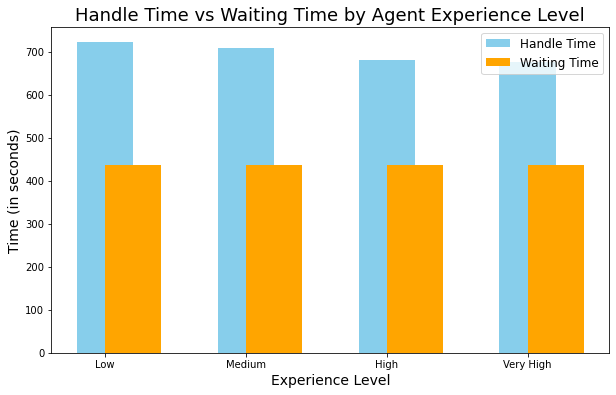

In [78]:
# Plotting a bar chart to compare handle time and waiting time by experience level

experience_levels = experience_performance.index
handle_time = experience_performance['handle_time']
waiting_time = experience_performance['waiting_time']

plt.figure(figsize = (10, 6))
plt.bar(experience_levels, handle_time, width = 0.4, label = 'Handle Time', color = 'skyblue', align = 'center')
plt.bar(experience_levels, waiting_time, width = 0.4, label = 'Waiting Time', color = 'orange', align = 'edge')

plt.title('Handle Time vs Waiting Time by Agent Experience Level', fontsize=18)
plt.xlabel('Experience Level', fontsize = 14)
plt.ylabel('Time (in seconds)', fontsize = 14)
plt.legend(fontsize = 12)

plt.show()

In [79]:
df.groupby('experience_level').count()

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_id,agent_id_y,call_start_datetime,...,elite_level_code,call_start_date,call_start_time,agent_assigned_date,agent_assigned_time,call_end_date,call_end_time,handle_time,waiting_time,agent_experience
experience_level,,,,,,,,,,,,,,,,,,,,,
Low,18183,18183,18183,18183,18183,18183,18183,18183,18183,18183,...,18183,18183,18183,18183,18183,18183,18183,18183,18183,18183
Medium,18065,18065,18065,18065,18065,18065,18065,18065,18065,18065,...,18065,18065,18065,18065,18065,18065,18065,18065,18065,18065
High,17685,17685,17685,17685,17685,17685,17685,17685,17685,17685,...,17685,17685,17685,17685,17685,17685,17685,17685,17685,17685
Very High,17877,17877,17877,17877,17877,17877,17877,17877,17877,17877,...,17877,17877,17877,17877,17877,17877,17877,17877,17877,17877


Analysis: Can provide more trainings to agents who have medium and low experince level

### **Agent Tone**

In [80]:
agent_tone_performance = df.groupby('agent_tone')[['handle_time', 'waiting_time']].mean()
agent_tone_performance

,handle_time,waiting_time
agent_tone,,
Unknown,322.672811,446.267281
angry,394.395887,425.089974
calm,626.499696,443.528267
frustrated,617.068404,424.397394
neutral,750.276439,434.443613
polite,220.000000,461.379310


### **Analysis**:

1. Agents with a polite tone have the lowest handle time (220 seconds), meaning they resolve issues faster.


2. Agents with a neutral tone have the highest handle time (750 seconds).


3. The waiting time is relatively higher for agents with an unknown tone (446 seconds) and polite tone (461 seconds), while it's lower for agents with an angry (425 seconds) or frustrated tone (424 seconds).

### **Insights**:

1. Agents who are polite seem to resolve issues the fastest, likely because customers may feel more comfortable and satisfied, leading to quicker resolutions.


2. Interestingly, agents with a neutral tone have the longest handle times, suggesting that a neutral approach may not engage the customer as effectively, leading to more drawn-out conversations.


3. While angry and frustrated tones show slightly lower waiting times, it doesn't necessarily lead to faster issue resolution, as their handle times are higher compared to polite agents.

**Here, by providing training the agents to maintain a polite and friendly tone can help improve efficiency.**

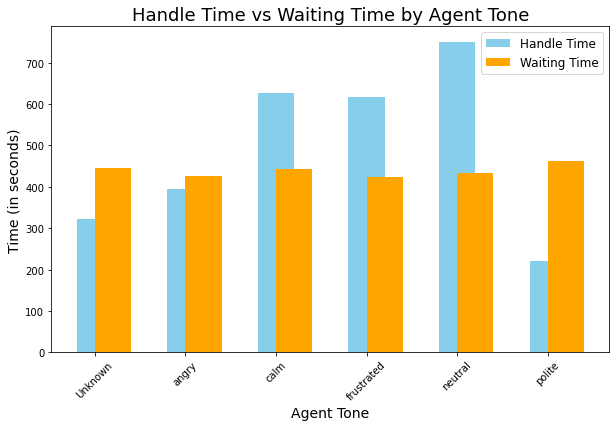

In [81]:
# Plotting Handle Time and Waiting Time for each agent tone

agent_tones = agent_tone_performance.index
handle_time = agent_tone_performance['handle_time']
waiting_time = agent_tone_performance['waiting_time']


plt.figure(figsize = (10, 6))
plt.bar(agent_tones, handle_time, width = 0.4, label = 'Handle Time', color = 'skyblue', align = 'center')
plt.bar(agent_tones, waiting_time, width = 0.4, label = 'Waiting Time', color = 'orange', align = 'edge')

plt.title('Handle Time vs Waiting Time by Agent Tone', fontsize = 18)
plt.xlabel('Agent Tone', fontsize = 14)
plt.ylabel('Time (in seconds)', fontsize = 14)
plt.xticks(rotation = 45)
plt.legend(fontsize = 12)

plt.show()

## **FACTOR : 3**

### **Sentiment**

In [82]:
sentiment_performance = df.groupby('average_sentiment')[['handle_time', 'waiting_time']].mean()
sentiment_performance

,handle_time,waiting_time
average_sentiment,,
-1.38,60.0,480.0
-1.25,0.0,540.0
-1.22,120.0,240.0
-1.19,60.0,600.0
-1.17,0.0,240.0
...,...,...
0.93,60.0,600.0
0.96,720.0,480.0
1.00,50.0,410.0


### **Analysis**: 

1. Handle time (blue dots) shows a wide range, especially when the sentiment is slightly negative (around -0.5). Handle times are scattered from very low to extremely high (~1750 seconds) in this sentiment range.


2. Waiting time (orange dots) remains fairly consistent across different sentiment levels, with only minor fluctuations. It stays mostly in the 200-600 seconds range, regardless of whether the sentiment is positive or negative.


### **Insights**: 

1. When the conversation is neutral or slightly negative, the handle time seems to vary the most. This could mean that when customers are somewhat dissatisfied or unclear, agents might take much longer to resolve the issue, possibly due to more complex discussions or indecisiveness from the customer.


2. Interestingly, extremely negative or extremely positive sentiment does not seem to result in longer handle times. This suggests that extreme emotions (either positive or negative) might lead to quicker resolutions, either because the issue is simple or the customer is more direct about their needs.


3. Waiting time stays relatively stable across all sentiment levels, indicating that customer sentiment doesn’t affect how long they wait to speak to an agent

**Here, the special attention might be needed for customers who display neutral or slightly negative sentiment to resolve their issues more efficiently**

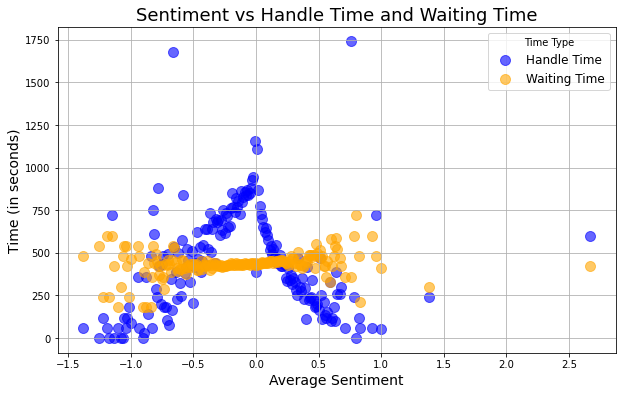

In [84]:
# Plotting Handle Time vs Sentiment and Waiting Time vs Sentiment

sentiment = sentiment_performance.index
handle_time = sentiment_performance['handle_time']
waiting_time = sentiment_performance['waiting_time']

plt.figure(figsize=(10, 6))
plt.scatter(sentiment, handle_time, color = 'blue', label = 'Handle Time', s = 100, alpha = 0.6)
plt.scatter(sentiment, waiting_time, color = 'orange', label = 'Waiting Time', s = 100, alpha = 0.6)

plt.title('Sentiment vs Handle Time and Waiting Time', fontsize = 18)
plt.xlabel('Average Sentiment', fontsize = 14)
plt.ylabel('Time (in seconds)', fontsize = 14)
plt.legend(title = 'Time Type', fontsize = 12)
plt.grid(True)


plt.show()

## **FACTOR : 4**

### **Primary Call Reason**

In [85]:
primary_reason_performance = df.groupby('primary_call_reason')[['handle_time', 'waiting_time']].mean()
primary_reason_performance

,handle_time,waiting_time
primary_call_reason,,
Baggage,333.644068,542.097458
Booking,427.736064,240.227531
Check In,574.128151,355.840336
Checkout,1016.853814,724.703390
Communications,826.718750,239.968750
Digital Support,372.293878,505.714286
Disability,292.109181,503.523573
ETC,962.899160,544.285714
IRROPS,785.116069,360.081136


### **Analysis**:

1. Checkout has the longest handle time (1016.9 seconds) and high waiting time (724.7 seconds). This suggests that checkout issues are complex and may require more agent intervention.


2. Voluntary Cancel has a relatively high handle time (721.9 seconds) and a moderate waiting time (539.5 seconds), meaning it also involves complex interactions.


3. Communications, Schedule Change, and Booking have significantly lower waiting times (around 240 seconds) and moderate handle times (between 372 to 490 seconds).


4. Issues like Baggage have a shorter handle time (333.6 seconds) but higher waiting time (542.1 seconds), meaning customers wait longer for a relatively quick resolution.

### **Insights**:

1. Checkout and Voluntary Cancel take the longest to resolve, indicating these areas might benefit from improved processes or tools to reduce agent workload and simplify customer interactions.


2. Baggage and Unaccompanied Minor show high waiting times, possibly indicating that these issues are lower in priority or that more resources should be allocated to reduce wait times.


3. Communications and Schedule Changes are generally quicker to resolve and have short waiting times, meaning these issues are likely more straightforward and may be ideal candidates for self-service options through IVR systems or online tools.

**Here, complex issues like Checkout and Voluntary Cancel may need more focus on process improvement, while quicker and simpler tasks like Schedule Changes could be handled more effectively through self-service to reduce agent intervention**

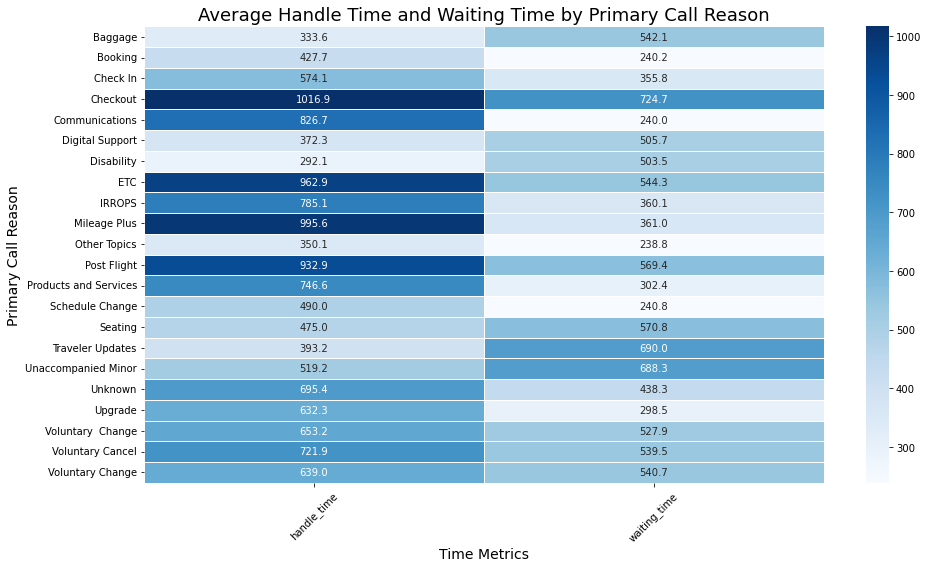

In [86]:
# Creating a heatmap 

primary_reason_performance_reset = primary_reason_performance.reset_index()


plt.figure(figsize = (14, 8))
sns.heatmap(primary_reason_performance.pivot_table(values = ['handle_time', 'waiting_time'], index = primary_reason_performance.index), 
            annot = True, cmap = 'Blues', linewidths = 0.5, fmt = '.1f')

plt.title('Average Handle Time and Waiting Time by Primary Call Reason', fontsize=18)
plt.xlabel('Time Metrics', fontsize =  14)
plt.ylabel('Primary Call Reason', fontsize = 14)
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

## **FACTOR : 5**

### **Call Timing and Shift Timing? Is it peak hour or non peak hour?**

In [88]:
df['call_hour'] = df['call_start_datetime'].dt.hour

In [89]:
peak_hour = df.groupby('call_start_time').count()
peak_hour

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_id,agent_id_y,call_start_datetime,...,call_start_date,agent_assigned_date,agent_assigned_time,call_end_date,call_end_time,handle_time,waiting_time,agent_experience,experience_level,call_hour
call_start_time,,,,,,,,,,,,,,,,,,,,,
00:00:00,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
00:01:00,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
00:02:00,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
00:03:00,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
00:04:00,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23:55:00,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
23:56:00,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
23:57:00,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14


In [90]:
# peak_hour.sort_values(by = 'call_id', ascending = False).head(10)

In [91]:
timelist = peak_hour.sort_values(by='call_id', ascending=False).head(10).index.tolist()

In [92]:
df['is_peaktime'] = df['call_start_time'].isin(timelist)

In [93]:
df.columns

Index(['call_id', 'agent_id_x', 'agent_tone', 'customer_tone',
       'average_sentiment', 'silence_percent_average', 'primary_call_reason',
       'customer_id', 'agent_id_y', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'customer_name', 'elite_level_code', 'call_start_date',
       'call_start_time', 'agent_assigned_date', 'agent_assigned_time',
       'call_end_date', 'call_end_time', 'handle_time', 'waiting_time',
       'agent_experience', 'experience_level', 'call_hour', 'is_peaktime'],
      dtype='object')

In [94]:
timing_performance = df.groupby('is_peaktime')[['handle_time', 'waiting_time']].mean()
timing_performance

,handle_time,waiting_time
is_peaktime,,
False,697.046917,437.091331
True,697.155716,435.553555


### **Analysis**:

1. Handle Time slightly increases during peak hours (from 697.05 seconds to 697.16 seconds). This shows that calls take a bit longer to handle when the call center is busier.


2. Waiting Time is lower during peak hours (drops from 437.09 seconds to 435.55 seconds), meaning customers wait less to get connected to an agent during peak times.

### **Insights**:

1. The increase in handle time during peak hours is very small, suggesting that the agents are able to manage calls efficiently, even when demand is higher.


2. Interestingly, the waiting time decreases during peak hours, which might indicate that more resources (agents) are allocated during peak times, allowing for quicker customer service, or the system prioritizes faster connections during busy periods.

**Here, peak hours don’t significantly impact handle time, but they do reduce waiting time slightly, which is a positive indicator for resource management during busy periods**

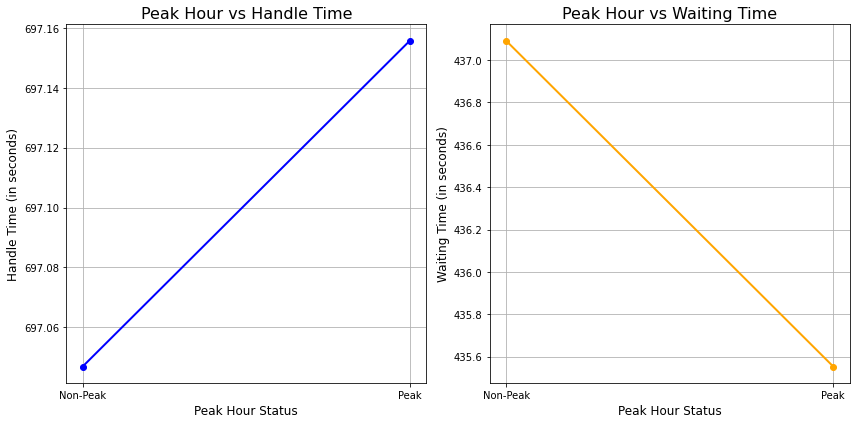

In [96]:
# Creating a figure with two subplots for handle time and waiting time

peak_status = ['Non-Peak', 'Peak']
handle_time = timing_performance['handle_time']
waiting_time = timing_performance['waiting_time']


plt.figure(figsize = (12, 6))

# Handle Time vs Peak Hour
plt.subplot(1, 2, 1)
plt.plot(peak_status, handle_time, marker = 'o', color = 'blue', label = 'Handle Time', linewidth = 2)
plt.title('Peak Hour vs Handle Time', fontsize = 16)
plt.xlabel('Peak Hour Status', fontsize = 12)
plt.ylabel('Handle Time (in seconds)', fontsize = 12)
plt.grid(True)

# Waiting Time vs Peak Hour
plt.subplot(1, 2, 2)
plt.plot(peak_status, waiting_time, marker = 'o', color = 'orange', label = 'Waiting Time', linewidth = 2)
plt.title('Peak Hour vs Waiting Time', fontsize = 16)
plt.xlabel('Peak Hour Status', fontsize = 12)
plt.ylabel('Waiting Time (in seconds)', fontsize = 12)
plt.grid(True)


plt.tight_layout()
plt.show()

## **FACTOR : 6**

### **Customer Tone**

In [97]:
customer_tone_performance = df.groupby('customer_tone')[['handle_time', 'waiting_time']].mean()
customer_tone_performance

,handle_time,waiting_time
customer_tone,,
angry,695.530261,436.445031
calm,699.604098,437.832299
frustrated,692.738764,436.803371
neutral,707.625312,437.754085
polite,689.659731,436.499896


### **Analysis**:

1. Handle time is highest when the customer has a neutral tone (707.6 seconds) and lowest when the customer is polite (689.7 seconds).


2. Waiting time remains fairly consistent across all tones, ranging from 436 to 438 seconds.

### **Insights**:

1. Customers with a neutral tone seem to have the longest handle times. This could indicate that neutral-toned customers are more reserved or unclear about their issues, which requires more back-and-forth to resolve their problems.


2. Interestingly, customers who are polite have the shortest handle times, suggesting that polite customers might communicate their needs more clearly, leading to faster resolutions.


3. Waiting time is consistent across different customer tones, indicating that the customer's emotional state doesn’t impact how long they have to wait to speak to an agent.

**Here, we can say that clear and positive communication from the customer side might help resolve issues faster**

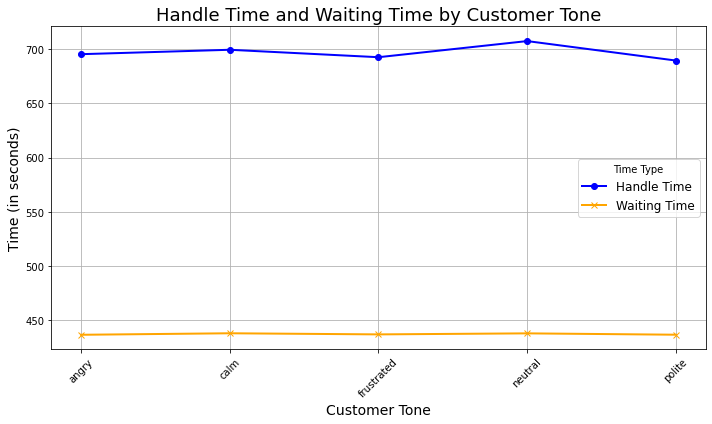

In [102]:
#Creating a plot for Handle Time and Waiting Time by Customer Tone

customer_tones = customer_tone_performance.index
handle_time = customer_tone_performance['handle_time']
waiting_time = customer_tone_performance['waiting_time']


plt.figure(figsize=(10, 6))

# Handle Time
plt.plot(customer_tones, handle_time, marker = 'o', label = 'Handle Time', color = 'blue', linewidth = 2)

# Waiting Time
plt.plot(customer_tones, waiting_time, marker = 'x', label = 'Waiting Time', color = 'orange', linewidth = 2)

plt.title('Handle Time and Waiting Time by Customer Tone', fontsize=18)
plt.xlabel('Customer Tone', fontsize = 14)
plt.ylabel('Time (in seconds)', fontsize = 14)
plt.xticks(rotation = 45)
plt.grid(True)
plt.legend(title = 'Time Type', fontsize = 12)


plt.tight_layout()
plt.show()

## **FACTOR : 7**

### **Customer Loyality Status**

In [100]:
df.columns

Index(['call_id', 'agent_id_x', 'agent_tone', 'customer_tone',
       'average_sentiment', 'silence_percent_average', 'primary_call_reason',
       'customer_id', 'agent_id_y', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'customer_name', 'elite_level_code', 'call_start_date',
       'call_start_time', 'agent_assigned_date', 'agent_assigned_time',
       'call_end_date', 'call_end_time', 'handle_time', 'waiting_time',
       'agent_experience', 'experience_level', 'call_hour', 'is_peaktime'],
      dtype='object')

In [101]:
loyalty_status_performance = df.groupby('elite_level_code')[['handle_time', 'waiting_time']].mean()
loyalty_status_performance

,handle_time,waiting_time
elite_level_code,,
0,695.999166,438.579273
1,675.404739,440.639809
2,726.449925,432.772795
3,727.510460,429.341004
4,788.244706,413.308235
5,896.950608,411.410165


### **Analysis**:

1. Handle time increases as the elite level increases. Customers with elite level 5 have the longest handle time (896.9 seconds), while customers with elite level 0 have a shorter handle time (696 seconds).


2. Waiting time decreases as the elite level increases. Elite level 5 customers wait the least (411.4 seconds), while elite level 0 customers wait the longest (438.6 seconds).

### **Insights**:

1. Higher loyalty customers (elite levels 4 and 5) tend to have longer handle times. This could indicate that these customers are given more personalized attention, or their issues might be more complex due to the value they bring to the business.


2. However, these high-loyalty customers also experience shorter waiting times, suggesting that they are prioritized in the queue and attended to more quickly, likely due to their importance to the business.


3. Lower loyalty customers (elite level 0) have shorter handle times but longer waiting times, suggesting that they are not given the same priority as elite customers.

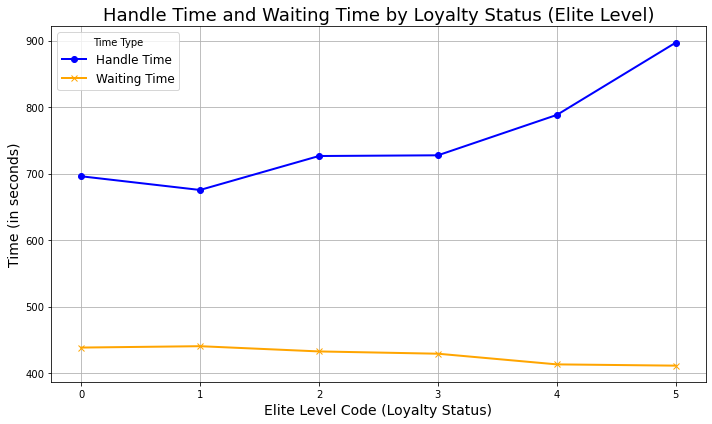

In [104]:
# Creating a plot for Handle Time and Waiting Time by Loyalty Status (Elite Level)

elite_levels = loyalty_status_performance.index
handle_time = loyalty_status_performance['handle_time']
waiting_time = loyalty_status_performance['waiting_time']


plt.figure(figsize=(10, 6))

# Handle Time
plt.plot(elite_levels, handle_time, marker = 'o', label = 'Handle Time', color = 'blue', linewidth = 2)

# Waiting Time
plt.plot(elite_levels, waiting_time, marker = 'x', label = 'Waiting Time', color = 'orange', linewidth = 2)

plt.title('Handle Time and Waiting Time by Loyalty Status (Elite Level)', fontsize = 18)
plt.xlabel('Elite Level Code (Loyalty Status)', fontsize = 14)
plt.ylabel('Time (in seconds)', fontsize = 14)
plt.grid(True)
plt.legend(title ='Time Type', fontsize = 12)


plt.tight_layout()
plt.show()

## **FACTOR : 8**

### **Silenece Percentage**

In [105]:
silence_performance = df.groupby(pd.cut(df['silence_percent_average'], bins = 4))[['handle_time', 'waiting_time']].mean()
silence_performance

,handle_time,waiting_time
silence_percent_average,,
"(-0.00098, 0.245]",424.751994,439.358307
"(0.245, 0.49]",838.864143,434.565702
"(0.49, 0.735]",1167.731196,436.516646
"(0.735, 0.98]",1493.250000,431.000000


### **Analysis**:

1. Handle time increases significantly as the silence percentage increases. For the lowest silence percentage range (0-24.5%), the handle time is 424.75 seconds, while for the highest range (73.5%-98%), it reaches a staggering 1493.25 seconds.


2. Waiting time, on the other hand, remains fairly consistent, ranging between 431 and 439 seconds, with the highest silence percentage range having a slightly lower waiting time.

### **Insights**:

1. As the silence percentage increases, the handle time dramatically increases. This suggests that long periods of silence during a call may be linked to complex or unresolved issues where both the customer and agent might be uncertain about how to proceed, leading to longer conversations.


2. The waiting time does not seem to be significantly impacted by silence percentage, meaning that how long a customer waits before speaking to an agent doesn’t affect how much silence there is during the call.

**Here, reducing silence by providing more guidance or clarity during the call could help reduce the overall handling time**

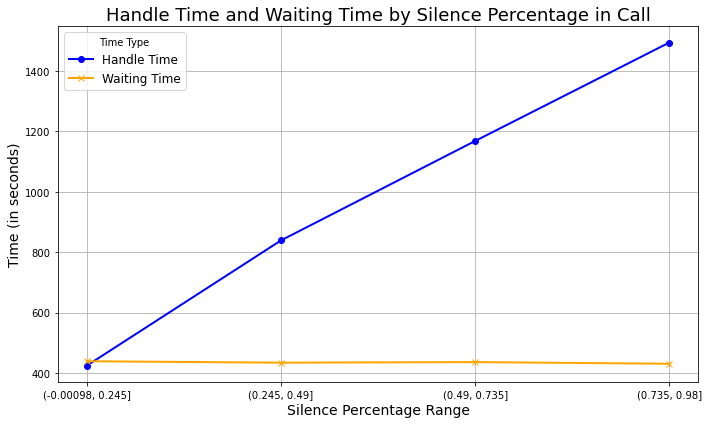

In [106]:
# Creating plot for Handle Time and Waiting Time by Silence Percentage in Call

silence_bins = silence_performance.index.astype(str)  # Convert the index to string for better labeling
handle_time = silence_performance['handle_time']
waiting_time = silence_performance['waiting_time']

plt.figure(figsize=(10, 6))

# Handle Time
plt.plot(silence_bins, handle_time, marker = 'o', label = 'Handle Time', color = 'blue', linewidth = 2)

# Waiting Time
plt.plot(silence_bins, waiting_time, marker = 'x', label = 'Waiting Time', color = 'orange', linewidth = 2)

plt.title('Handle Time and Waiting Time by Silence Percentage in Call', fontsize=18)
plt.xlabel('Silence Percentage Range', fontsize = 14)
plt.ylabel('Time (in seconds)', fontsize = 14)
plt.grid(True)
plt.legend(title = 'Time Type', fontsize = 12)

plt.tight_layout()
plt.show()

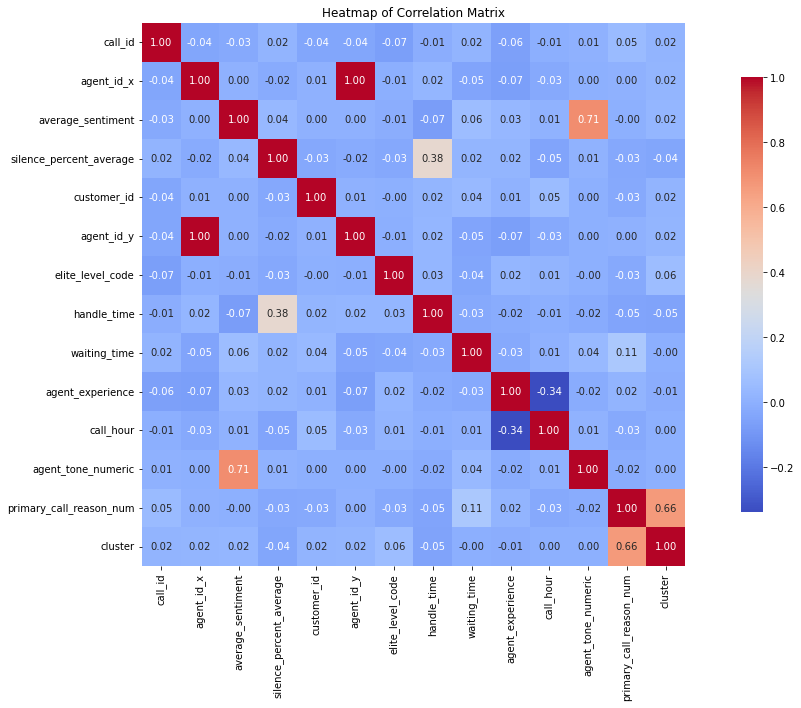

In [164]:
# Calculate correlation matrix
filtered_df = df[df['is_peaktime']]
filtered_df = filtered_df.select_dtypes(include='number')

corr = filtered_df.corr()
plt.figure(figsize=(20, 10))  # Set the size of the figure
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={'shrink': .8})
plt.title('Heatmap of Correlation Matrix')
plt.show()

### **Key drivers of long AHT and AST (During High Call Volume Periods)**

**Finally we can say that, based on the above analysis, the following factors contribute to longer AHT and AST, particularly during high-volume call periods:**

1. Customer Tone
2. Agent Experience
3. Primary Call for Reason
4. Peak Hours
5. Silence Percentage
6. Customer Loyalty Status

**Common Insights and Uncovering New Findings:**

1. Long handle times are driven by unclear communication (neutral tone), complex call reasons (checkout), and high silence percentages.


2. Peak hour efficiency: While waiting times decrease, handle times increase slightly due to higher pressure.


3. Improving clarity through agent training, self-service options, and structured call flows can reduce handle times.


**Uncovering Insights:**

1. Silence percentage is a critical factor for long handle times across all call types. Reducing silence through better agent guidance and conversation strategies is a key area for improvement.


2. Communication clarity is crucial. Enhancing customer-agent interactions during neutral tone and complex issues can significantly reduce AHT.

### **Quantifying the Percentage Difference Between AHT for Most and Least Frequent Call Reasons**

In [109]:
# Calculating AHT and AST across the entire dataset

total_handle_time = df['handle_time'].sum()
total_calls = len(df)

In [110]:
AHT = total_handle_time / total_calls
AST = df['waiting_time'].sum() / total_calls

print(f"Average Handle Time (AHT): {AHT} seconds")
print(f"Average Speed to Answer (AST): {AST} seconds")

Average Handle Time (AHT): 697.0486004734717 seconds
Average Speed to Answer (AST): 437.0675393399248 seconds


In [111]:
# Finding the most and least frequent call reasons

most_frequent_reason = df['primary_call_reason'].value_counts().idxmax()
least_frequent_reason = df['primary_call_reason'].value_counts().idxmin()

In [112]:
# Calculating AHT for both

most_frequent_AHT = df[df['primary_call_reason'] == most_frequent_reason]['handle_time'].mean()
least_frequent_AHT = df[df['primary_call_reason'] == least_frequent_reason]['handle_time'].mean()

In [113]:
# Calculating percentage difference

percentage_diff = ((most_frequent_AHT - least_frequent_AHT) / least_frequent_AHT) * 100

print(f"Percentage difference in AHT between most and least frequent call reasons: {percentage_diff:.2f}%")

Percentage difference in AHT between most and least frequent call reasons: 51.21%


# **DELIVERABLE - 2**

We often observe self-solvable issues unnecessarily escalating to agents, increasing their workload. Analyse the transcripts and call reasons to identify granular reasons associated to recurring problems that could be resolved via self-service options in the IVR system. Propose specific improvements to the IVR options to effectively reduce agent intervention in these cases, along with solid reasoning to support your recommendations.


In [115]:
# Group by primary call reason to identify recurring problems

call_reason_counts = df['primary_call_reason'].value_counts()
print(call_reason_counts)

IRROPS                   13311
Voluntary Change         10699
Seating                   6365
Mileage Plus              5851
Unknown                   5157
Post Flight               4330
Communications            3840
Products and Services     3332
Baggage                   2832
Upgrade                   2738
Booking                   2637
Check In                  1904
Checkout                  1888
Voluntary Cancel          1607
Digital Support           1225
ETC                        952
Traveler Updates           937
Other Topics               818
Schedule Change            731
Disability                 403
Voluntary  Change          149
Unaccompanied Minor        104
Name: primary_call_reason, dtype: int64


IRROPS                   13311
Voluntary Change         10699
Seating                   6365
Mileage Plus              5851
Unknown                   5157
Post Flight               4330
Communications            3840
Products and Services     3332
Baggage                   2832
Upgrade                   2738
Booking                   2637
Check In                  1904
Checkout                  1888
Voluntary Cancel          1607
Digital Support           1225
ETC                        952
Traveler Updates           937
Other Topics               818
Schedule Change            731
Disability                 403
Voluntary  Change          149
Unaccompanied Minor        104
Name: primary_call_reason, dtype: int64


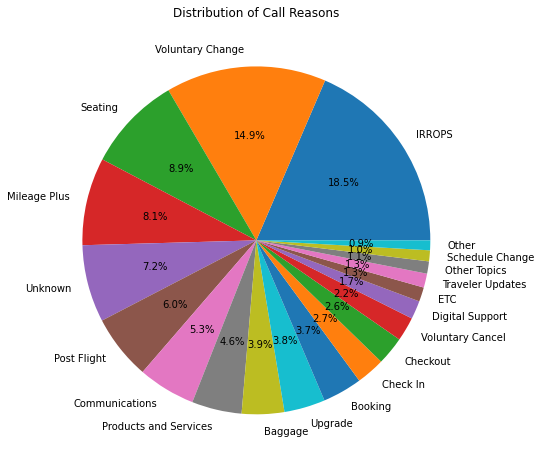

In [118]:
#Converting into % and creating a pie chart

reason_counts = df['primary_call_reason'].value_counts()
print(reason_counts)
total_calls = len(df)
reason_percentages = (reason_counts / total_calls) * 100

other_reasons_percentage = reason_percentages[reason_percentages < 1].sum()
other_reasons_count = reason_counts[reason_percentages < 1].sum()
major_reasons = reason_percentages[reason_percentages >= 1]
major_reasons_counts = reason_counts[reason_percentages >= 1]

labels = list(major_reasons.index) + ['Other']
sizes = list(major_reasons_counts) + [other_reasons_count]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Call Reasons')
plt.show()

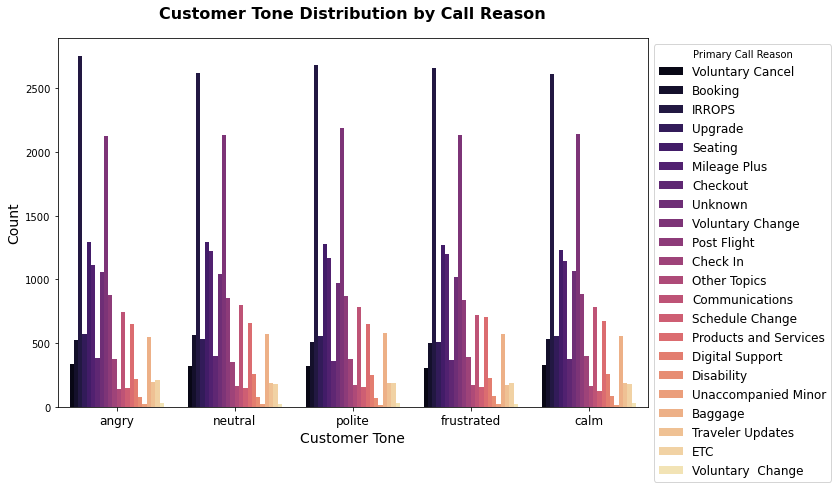

In [117]:
#Creating a visual for Customer Tone Distribution by Call Reason

plt.figure(figsize = (12, 7))
sns.countplot(data = df, x = 'customer_tone', hue = 'primary_call_reason', palette = "magma")
plt.xticks(fontsize = 12)
plt.xlabel("Customer Tone", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Customer Tone Distribution by Call Reason", fontsize = 16, weight = 'bold', pad = 20)
plt.legend(title = "Primary Call Reason", bbox_to_anchor = (1, 1), loc = "upper left", fontsize =12)

plt.tight_layout(pad=2)
plt.show()

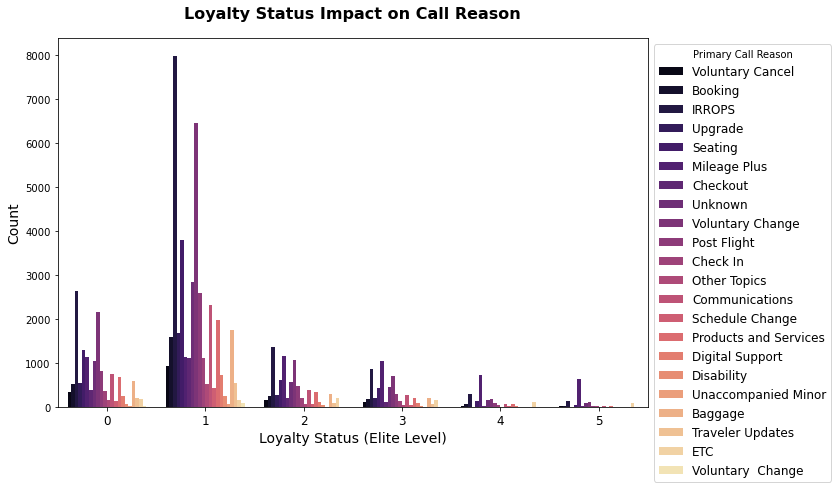

In [119]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='elite_level_code', hue='primary_call_reason', palette="magma")
plt.xticks(fontsize=12)
plt.xlabel("Loyalty Status (Elite Level)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Loyalty Status Impact on Call Reason", fontsize=16, weight='bold', pad=20)
plt.legend(title="Primary Call Reason", bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)
plt.tight_layout(pad=2)
plt.show()

In [131]:
primary_call_data = df.groupby('primary_call_reason').agg(
    avg_sentiment=('average_sentiment', 'mean'),
    avg_AHT=('handle_time', 'mean'),
    avg_AST=('waiting_time', 'mean')
).reset_index()
print(primary_call_data)

      primary_call_reason  avg_sentiment      avg_AHT     avg_AST
0                 Baggage      -0.019682   333.644068  542.097458
1                 Booking      -0.013394   427.736064  240.227531
2                Check In      -0.042957   574.128151  355.840336
3                Checkout      -0.068978  1016.853814  724.703390
4          Communications      -0.036388   826.718750  239.968750
5         Digital Support      -0.042041   372.293878  505.714286
6              Disability       0.035757   292.109181  503.523573
7                     ETC      -0.049296   962.899160  544.285714
8                  IRROPS      -0.073988   785.116069  360.081136
9            Mileage Plus      -0.027390   995.573406  361.015211
10           Other Topics      -0.003888   350.097800  238.753056
11            Post Flight      -0.063813   932.896074  569.431871
12  Products and Services      -0.034409   746.560624  302.448980
13        Schedule Change      -0.033844   490.013680  240.820793
14        

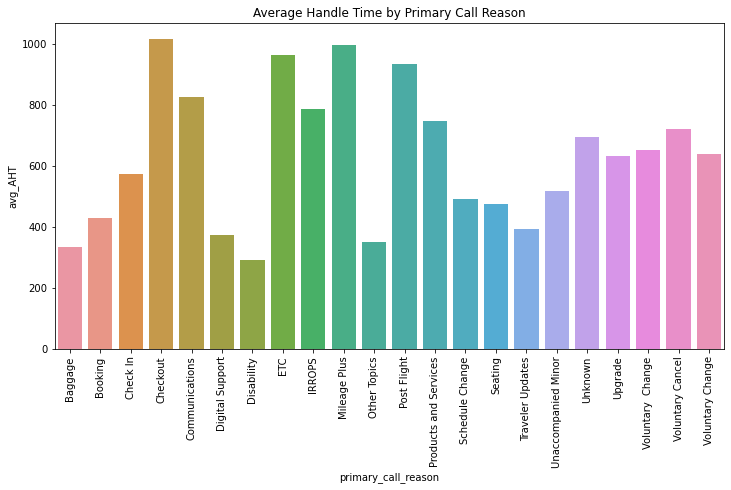

In [134]:
#Creating a visual of Average Handle Time by Primary Call Reason

plt.figure(figsize=(12, 6))
sns.barplot(x='primary_call_reason', y='avg_AHT', data=primary_call_data)
plt.xticks(rotation=90)
plt.title('Average Handle Time by Primary Call Reason')
plt.show()

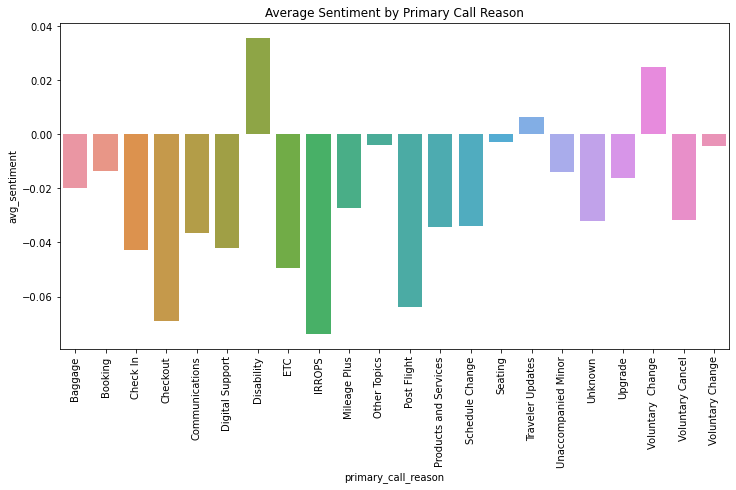

In [135]:
# Creating a visual for Average Sentiment by Primary Call Reason

plt.figure(figsize=(12, 6))
sns.barplot(x='primary_call_reason', y='avg_sentiment', data=primary_call_data)
plt.xticks(rotation=90)
plt.title('Average Sentiment by Primary Call Reason')
plt.show()

**After analysizing the above information, we are classifying the Call Reasons into Self Service/IVR and Agent Needed based on the following factors:**

1. Average Sentiment: If sentiment is negative or low, customers may require more personalized agent support.


2. AHT (Average Handle Time): Shorter AHT indicates simpler issues that could be handled through self-service.


3. AST (Average Speed to Answer): If AST is high, the call reason might be suitable for IVR to reduce waiting time.


In [128]:
self_solvable = [ 'Baggage', 'Booking', 'Seating', 'Schedule Change', 'Voluntary Change', 'Other Topics', 
                 'Products and Services', 'Digital Support', 'Traveler Updates','Voluntary Cancel']

# These call reasons are frequent and straightforward, with lower sentiment and manageable AHT, making them ideal candidates for automation

In [129]:
agent_needed = ['IRROPS', 'Mileage Plus', 'Checkout', 'Post Flight', 'Upgrade', 'Check In',
                'Communications', 'Disability', 'Unaccompanied Minor', 'ETC']

# These call reasons are more complex, involve sensitive customer interactions, or have higher AHT and negative sentiment, requiring human intervention.

In [124]:
df['issue_type'] = df['primary_call_reason'].apply(
    lambda x: 'self-solvable' if x in self_solvable else 'agent-needed'
)

In [125]:
df['issue_type'].value_counts()

agent-needed     40627
self-solvable    31183
Name: issue_type, dtype: int64

### **Proposed Improvements to IVR Options to Reduce Agent Intervention**

### **1. Baggage:**

**Avg Sentiment:** -0.019 (neutral)  
**AHT:** 333 seconds (low)  
**AST:** 542 seconds (high)

**Improvement:** Introduce automated baggage tracking and status updates in the IVR.

**How:** Customers can input their baggage ID or flight number to get real-time updates on the location of their luggage.  
**Reasoning:** Baggage status inquiries are repetitive and straightforward, ideal for automation. This will reduce call volume to agents and improve customer satisfaction by providing immediate answers.





### **2. Booking:**

**Avg Sentiment:** -0.013 (neutral)  
**AHT:** 427 seconds (moderate)  
**AST:** 240 seconds (low)

**Improvement:** Implement booking modification options within the IVR.

**How:** Allow customers to modify or confirm their bookings by inputting their booking reference numbers, without agent intervention.  
**Reasoning:** Basic booking changes, such as date or seat selection, are simple and frequent. Automating these interactions will streamline operations and reduce agent intervention for repetitive tasks.





### **3. Seating:**

**Avg Sentiment:** -0.003 (neutral)  
**AHT:** 475 seconds (moderate)  
**AST:** 571 seconds (high)

**Improvement:** Automate seat selection and changes through IVR.

**How:** Provide an option for customers to select or change seats via IVR by entering their booking reference. The system can then offer available seats and confirm changes.  
**Reasoning:** This is a frequent request that can be easily handled through automation. Automating seating arrangements reduces the need for agents to manage simple seat-related inquiries.





### **4. Schedule Change:**

**Avg Sentiment:** -0.034 (slightly negative)  
**AHT:** 490 seconds (moderate)  
**AST:** 241 seconds (low)

**Improvement:** Provide automated flight schedule changes.

**How:** Allow customers to check for changes in their flight schedule and make adjustments directly through IVR, without speaking to an agent.  
**Reasoning:** Schedule changes are frequent and often don’t require agent intervention. Automating this process allows customers to manage their schedules quickly and conveniently.





### **5. Voluntary Change:**

**Avg Sentiment:** -0.034 (slightly negative)  
**AHT:** 490 seconds (moderate)  
**AST:** 241 seconds (low)

**Improvement:** Automate voluntary flight changes via IVR.

**How:** Allow customers to modify their flight details (e.g., changing flight times or dates) via IVR by selecting from available options.  
**Reasoning:** Voluntary changes are often simple, especially when customers just want to change their booking details. Automating these changes will reduce agent load and provide faster service to customers.





### **6. Other Topics:**

**Avg Sentiment:** -0.004 (neutral)  
**AHT:** 350 seconds (low)  
**AST:** 239 seconds (low)


**Improvement:** Provide a self-service portal for miscellaneous requests via IVR.


**How:** Offer options for common but miscellaneous issues (such as inquiring about airport services) in the IVR, directing customers to the appropriate resources or FAQs.  
**Reasoning:** Most of these miscellaneous issues are easily resolvable with self-service or information portals, reducing the need for agents to handle these calls.





### **7. Products and Services:**

**Avg Sentiment:** -0.034 (slightly negative)  
**AHT:** 747 seconds (moderate)  
**AST:** 302 seconds (moderate)

**Improvement:** Automate inquiries about products and services in the IVR.

**How:** Provide detailed automated information about available products and services (e.g., loyalty programs, onboard services) through IVR.  
**Reasoning:** Inquiries about products and services are simple and can be automated. Automating responses will save agents time while still providing customers with the necessary information.





### **8. Digital Support:**

**Avg Sentiment:** -0.042 (slightly negative)  
**AHT:** 372 seconds (moderate)  
**AST:** 506 seconds (high)

**Improvement:** Offer automated troubleshooting and FAQ support via IVR.

**How:** Create a digital support section in the IVR system where customers can access troubleshooting steps for common issues.  
**Reasoning:** Many digital support inquiries are repetitive and can be resolved through automated processes or FAQ-based self-service, reducing the need for human intervention.





### **9. Traveler Updates:**

**Avg Sentiment:** 0.007 (neutral)  
**AHT:** 393 seconds (low)  
**AST:** 690 seconds (high)

**Improvement:** Automate real-time travel updates in IVR.

**How:** Provide an option for real-time flight status, delay information, and travel alerts through IVR, based on flight number or booking reference.  
**Reasoning:** Traveler updates are a frequent and simple request that can be fully automated. Providing real-time updates will reduce the number of calls directed to agents and improve the customer experience.





### **10. Voluntary Cancel:**

**Avg Sentiment:** -0.031 (slightly negative)  
**AHT:** 722 seconds (moderate)  
**AST:** 540 seconds (moderate)

**Improvement:** Allow customers to cancel flights via IVR.

**How:** Implement a flight cancellation option where customers can cancel their booking directly through the IVR.  
**Reasoning:** Simple cancellations don’t require human intervention. Automating this will save time for both customers and agents, especially when customers know they want to cancel without requiring further information.

# **DELIVERABLE - 3**

Understanding the primary reasons for incoming calls is vital for enhancing operational efficiency and improving customer service. Accurately categorizing call reasons enables the call center to streamline processes, reduce manual tagging efforts, and ensure that customers are directed to the appropriate resources. In this context, analyze the dataset to uncover patterns that can assist in understanding and identifying these primary call reasons. Please outline your approach, detailing the data analysis techniques and feature identification methods you plan to use. Optional task, you may utilize the `test.csv` file to generate and submit your predictions.

In [138]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [139]:
# Converting reasons to number to make it easier for creating correlation metric
reason_to_num = {
    'Seating': 1,
    'IRROPS': 2,
    'Voluntary Change': 3,
    'Mileage Plus': 4,
    'Unknown': 5,
    'Communications': 6,
    'Voluntary Cancel': 7,
    'ETC': 8,
    'Upgrade': 9,
    'Check In': 10,
    'Schedule Change': 11,
    'Products and Services': 12,
    'Booking': 13,
    'Other Topics': 14,
    'Post Flight': 15,
    'Digital Support': 16,
    'Baggage': 17,
    'Disability': 18,
    'Voluntary  Change': 3,
    'Checkout': 20,
    'Traveler Updates': 21,
    'Unaccompanied Minor': 22
}

# Creating map to convert customer tonr and agent tone into numbers

tone_mapping = {
    'polite': 0,
    'angry': 1,
    'frustrated': 2,
    'neutral': 3,
    'calm': 4,
    
}

# Applying the mapping to the 'customer_tone' column

df['customer_tone_numeric'] = df['customer_tone']
df['agent_tone_numeric'] = df['agent_tone'].map(tone_mapping)
df['primary_call_reason_num'] = df['primary_call_reason'].map(reason_to_num)
df['primary_call_reason_num'].unique()
df['agent_tone_numeric'].fillna(df['agent_tone_numeric'].median(), inplace = True)
df['agent_tone_numeric'].unique()

array([3., 4., 2., 1., 0.])

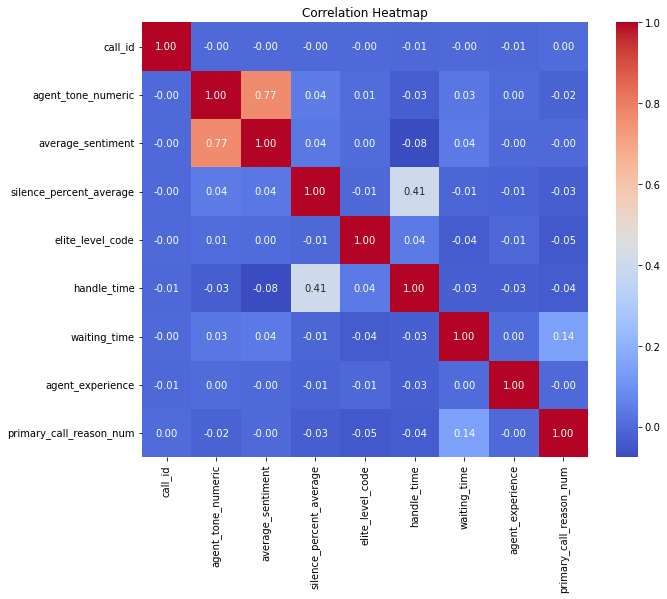

In [142]:
# Creating a Correlation Heatmap for understanding the relation between different features

plt.figure(figsize = (10, 8))
correlation_matrix = df[['call_id', 'customer_tone_numeric', 'agent_tone_numeric', 'average_sentiment', 'silence_percent_average', 
                      'elite_level_code', 'handle_time', 'waiting_time', 'agent_experience', 'primary_call_reason_num' ]].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap')

plt.show()

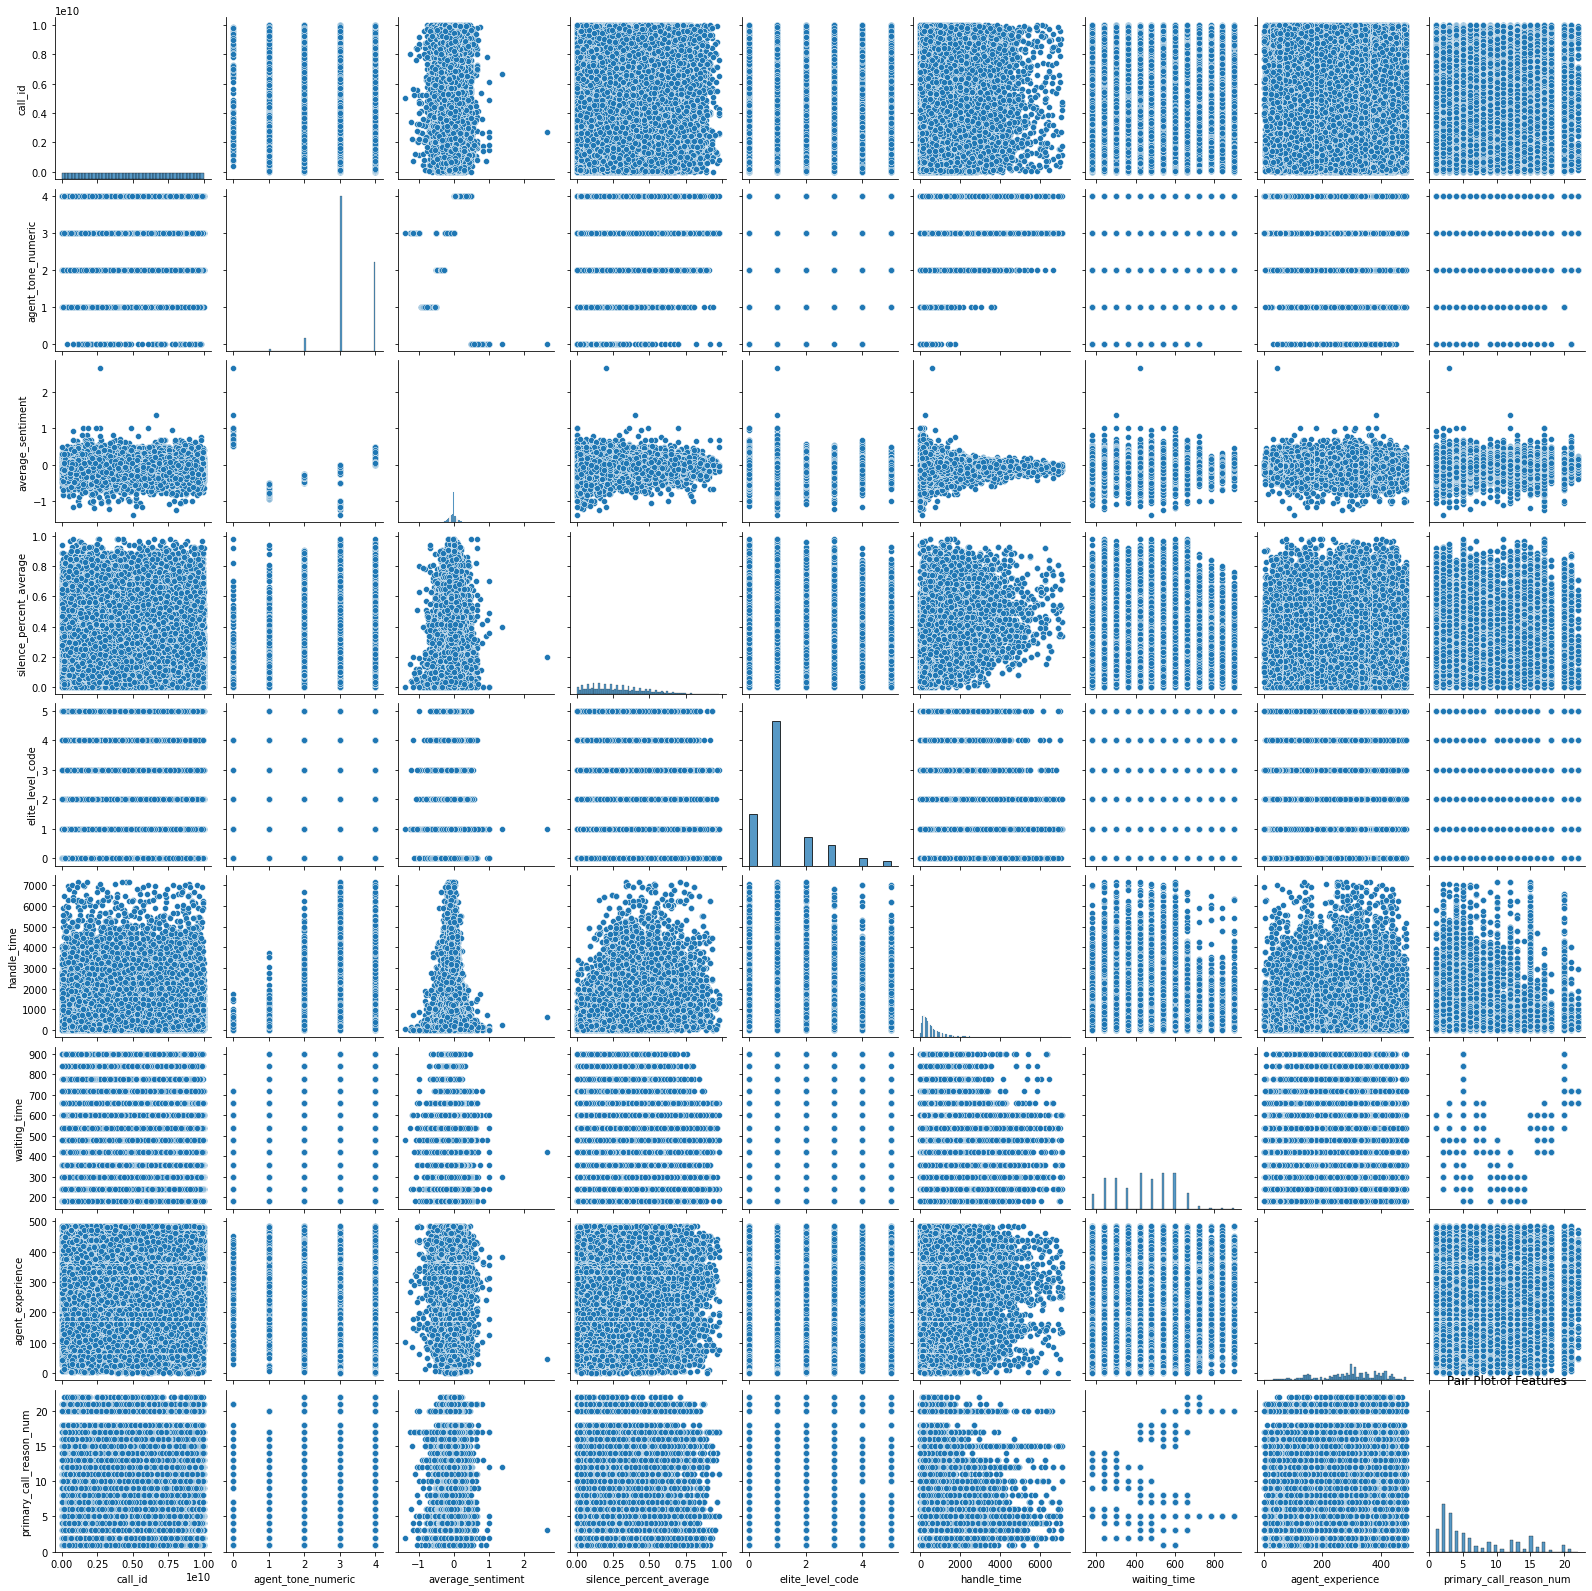

In [143]:
sns.pairplot(df[['call_id', 'customer_tone_numeric', 'agent_tone_numeric', 'average_sentiment', 'silence_percent_average', 
                 'elite_level_code', 'handle_time', 'waiting_time', 'agent_experience', 'primary_call_reason_num' ]])

plt.title('Pair Plot of Features')

plt.show()

### **Analysis**:

Primary call reasons and waiting time are related. 

**On the basis of this observation, we decided to use KMeans Model to categorize call reasons on the basis of AST(waiting time)**

In [145]:
one_hot_encoder = OneHotEncoder(sparse = False)

# Apply the OneHotEncoder on the desired columns

encoded_call_reason = one_hot_encoder.fit_transform(df[['primary_call_reason']])

In [147]:
X = pd.concat([
    pd.DataFrame(encoded_call_reason),
    df[[ 'waiting_time']]], axis = 1)

In [148]:
X.columns = X.columns.astype(str)

# Applying the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [150]:
#Note: used pca to reduce dimensions

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

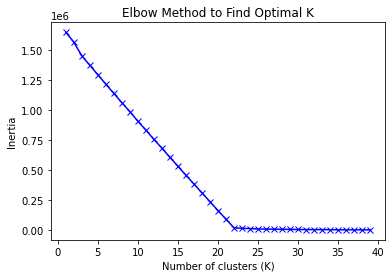

In [152]:
inertia = []
K_values = range(1, 40)  # Trying K from 1 to 40

for k in K_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(K_values, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal K')

plt.show()

### **Analysis**:

After using Elbow Method, we came to a conclusion that we should use k = 23

Reason: As there is a massive drop in inertia at k = 23

In [153]:
kmeans = KMeans(n_clusters = 23, random_state = 42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [156]:
cluster_composition = df.groupby('cluster')['primary_call_reason'].unique()
print(cluster_composition)

cluster
0                    [IRROPS]
1          [Voluntary Change]
2                   [Unknown]
3            [Communications]
4                   [Seating]
5          [Voluntary Cancel]
6     [Products and Services]
7              [Mileage Plus]
8                   [Booking]
9               [Post Flight]
10                  [Upgrade]
11         [Traveler Updates]
12                 [Check In]
13                 [Checkout]
14          [Digital Support]
15                  [Baggage]
16                      [ETC]
17          [Schedule Change]
18             [Other Topics]
19               [Disability]
20        [Voluntary  Change]
21      [Unaccompanied Minor]
22                  [Unknown]
Name: primary_call_reason, dtype: object


In [157]:
for cluster, reasons in cluster_composition.items():
    print(f"Cluster {cluster}:")
    
    for reason in reasons:
        print(f"  - {reason}")

Cluster 0:
  - IRROPS
Cluster 1:
  - Voluntary Change
Cluster 2:
  - Unknown
Cluster 3:
  - Communications
Cluster 4:
  - Seating
Cluster 5:
  - Voluntary Cancel
Cluster 6:
  - Products and Services
Cluster 7:
  - Mileage Plus
Cluster 8:
  - Booking
Cluster 9:
  - Post Flight
Cluster 10:
  - Upgrade
Cluster 11:
  - Traveler Updates
Cluster 12:
  - Check In
Cluster 13:
  - Checkout
Cluster 14:
  - Digital Support
Cluster 15:
  - Baggage
Cluster 16:
  - ETC
Cluster 17:
  - Schedule Change
Cluster 18:
  - Other Topics
Cluster 19:
  - Disability
Cluster 20:
  - Voluntary  Change
Cluster 21:
  - Unaccompanied Minor
Cluster 22:
  - Unknown


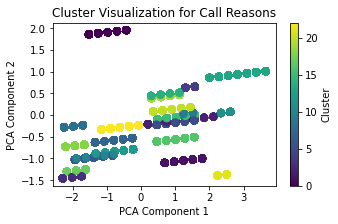

In [159]:
#Creating PCA Scatter plot

plt.figure(figsize = (5, 3))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = df['cluster'], cmap = 'viridis', s = 50)
plt.title('Cluster Visualization for Call Reasons')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label = 'Cluster')

plt.show()

In [160]:
sil_score = silhouette_score(X_scaled, df['cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.8725258630274998


### **Analysis**:

In this case, the silhouette score is 0.87, which is very high. This indicates that clustering algorithm has performed well, as the data points are well-separated and assigned to the correct clusters.

In [161]:
db_index = davies_bouldin_score(X_scaled, df['cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.16714476919918306


### **Analysis**:

In this case, the DB Index is 0.167, which is very low, suggesting that the clusters are very distinct and compact, which is a sign of good clustering performance.